### 1. MNIST 데이터셋 가져오기

In [59]:
# MNIST 데이터셋 가져오기
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 2. 탐색적 데이터 분석(EDA)

In [60]:
# 데이터의 shape
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

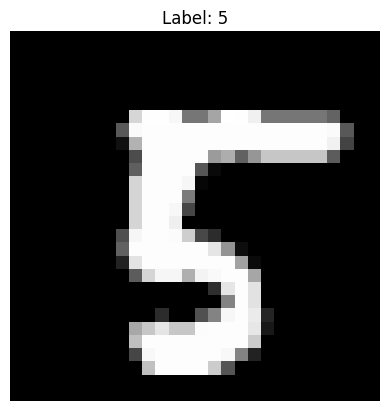

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# train_images에서 랜덤하게 이미지를 선택해서 matplotlib.pyplot으로 시각화
index = np.random.randint(0, train_images.shape[0])
plt.imshow(train_images[index], cmap='gray')
plt.title(f"Label: {train_labels[index]}")
plt.axis('off')
plt.show()

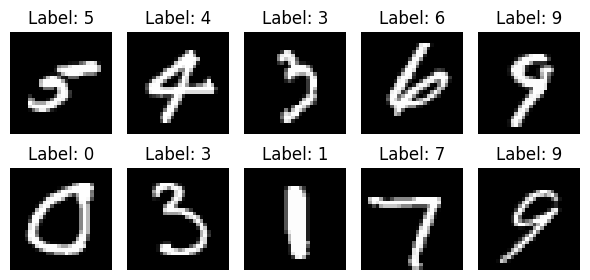

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# 랜덤하게 한번에 10장의 이미지를 출력하기. 2행 5열로

fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten() # 2x5 배열을 1차원 배열로 평탄화

for i in range(10):
    index = np.random.randint(0, train_images.shape[0])
    axes[i].imshow(train_images[index], cmap='gray')
    axes[i].set_title(f"Label: {train_labels[index]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

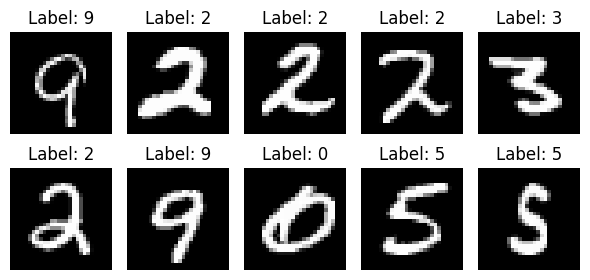

In [63]:
fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten() # 2x5 배열을 1차원 배열로 평탄화

for i in range(10):
    index = np.random.randint(0, test_images.shape[0])
    axes[i].imshow(test_images[index], cmap='gray')
    axes[i].set_title(f"Label: {test_labels[index]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 3. 데이터 전처리(valid 데이터 분할)

#### 3.1 정규화(Normalize) 0~233(int) -> 0\~1(float)
#### 3.2 레이블을 10진수 -> one-hot encoding
#### 3.3 reshape (60000,28,28) -> (60000,784)

In [64]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [65]:
print(train_labels[:5])
print(test_labels[:5])

[5 0 4 1 9]
[7 2 1 0 4]


In [66]:
# train_labels, test_labels를 onw-hot encoding으로 변환
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [67]:
print(train_labels[:5])
print(test_labels[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [68]:
# train_images, test_images를 reshape (60000,28,28) -> (60000,784)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [69]:
# train_images, train_labels에서 데이터를 분할
# train:valid = 8:2 (48000 : 12000)

from sklearn.model_selection import train_test_split

train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [70]:
train_images.shape, train_labels.shape, valid_images.shape, valid_labels.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

### 4. 신경망 모델링

In [77]:
from keras import models
from keras.layers import Dense, Flatten, Input

# keras로 mnist 데이터셋 모델링하기

# 신경망을 쌓아 올리는 방식
model = models.Sequential()

# 입력층(Input)을 정의
model.add(Input(shape=(28*28,)))
# model.add(Input(shape=(28, 28)))
# model.add(Flatten())

# 은닉층(Hidden)을 정의
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))

# 출력층(Output)을 정의
# activation을 softmax로 사용
# 다중 분류 모델의 출력값이 Logit(숫자)이 나오는데
# Logit을 확률로 변환해주는 함수 softmax
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,346 (2.10 MB)

 Trainable params: 550,346 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

두 코드 스니펫 모두 Keras 모델의 입력 레이어를 정의하고 28x28 크기의 이미지를 1차원 벡터로 평탄화하는 것을 목표로 합니다.

### 1. `model.add(Input(shape=(28*28,)))`

이 방법은 모델의 입력 형태가 이미 평탄화된 1차원 벡터(784개 요소)라고 가정합니다. 즉, 모델에 데이터를 넣기 전에 사용자가 직접 데이터를 평탄화해야 합니다. 예를 들어, `train_images.reshape(-1, 28*28)`과 같이 데이터를 미리 변환해야 합니다.

### 2. `model.add(Input(shape=(28, 28)))`
`model.add(Flatten())`

이 방법은 모델의 입력 형태가 28x28 크기의 2차원 이미지임을 명시하고, `Flatten` 레이어를 추가하여 모델 내부에서 자동으로 이 2차원 이미지를 1차원 벡터로 평탄화합니다. 이 방법은 이미지 데이터를 다룰 때 더 일반적이고 직관적입니다. 데이터를 미리 변환할 필요 없이 원본 이미지 형태 그대로 모델에 전달할 수 있습니다.

### 효율성 비교

두 방법 모두 최종적으로는 동일한 1차원 벡터를 다음 레이어로 전달합니다.

-   **계산 효율성:** `Flatten` 레이어는 단순히 데이터의 형태를 변경하는(reshape) 작업만 수행하므로, 실제로 수행하는 계산량은 매우 미미합니다. 따라서 두 방법 간의 **계산 효율성 차이는 거의 무시할 수 있는 수준**입니다.
-   **코드의 명확성 및 일반적인 사용:** 현재 `train_images`의 형태는 `(60000, 28, 28)`이므로, 데이터는 2차원 이미지 형태입니다. 이 경우 **두 번째 방법(`Input(shape=(28, 28))`와 `Flatten()`)이 데이터를 있는 그대로 모델에 전달하고 모델이 직접 평탄화하도록 하여 더 명확하고 일반적인 접근 방식**입니다.

따라서, 효율성 측면에서는 큰 차이가 없지만, 데이터의 현재 형태와 모델링의 일반적인 관행을 고려할 때 `Input(shape=(28, 28))`에 `Flatten()` 레이어를 추가하는 두 번째 방법이 더 적절하다고 볼 수 있습니다.

### 5. 모델설정(complie)

In [78]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [89]:
# 하이퍼-파라메터
EPOCHS = 100
BATCH_SIZE = 256
PATIENCE = 20

In [90]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ModelCheckpoint함수를 적용해서 val_loss를 기준으로 가장 좋은 성능의 모델을 mnist_best파일명으로 저장
# 모델 학습중 최적의 파라미터를 갱신하며 저장하기 때문에 중간에 중단되어도 모델이 남아있음
MC_CB = ModelCheckpoint(filepath='mnist_best.keras', monitor='val_loss', save_best_only=True)

# ReduceLROnPlateau 함수를 적용해서 val_loss를 기준으로 patience=15, factor=0.5 로 설정
RLROP_CB = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.00001)

# EarlyStopping callback함수를 적용해서 patience=10, 모니터 기준은 val_loss(다른 함수도 실험하기 위해 val_accuracy로 변경)로 설정
ES_CB = EarlyStopping(monitor='val_accuracy', mode='max', patience=PATIENCE)

### 6. 모델 학습(fit)

In [91]:
# callback함수를 사용하려면 callbacks 인수에 리스트로 등록
history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=EPOCHS, batch_size=BATCH_SIZE,
                    callbacks=[ES_CB, MC_CB, RLROP_CB])

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9912 - loss: 0.0297 - val_acc: 0.9753 - val_loss: 0.0803 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - acc: 0.9930 - loss: 0.0236 - val_acc: 0.9772 - val_loss: 0.0849 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - acc: 0.9947 - loss: 0.0168 - val_acc: 0.9797 - val_loss: 0.0790 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - acc: 0.9963 - loss: 0.0127 - val_acc: 0.9813 - val_loss: 0.0786 - learning_rate: 0.0010
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - acc: 0.9947 - loss: 0.0154 - val_acc: 0.9782 - val_loss: 0.0913 - learning_rate: 0.0010
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - acc: 0.9952 - loss: 0.0154 - val_acc: 0.9808 - val_loss: 0.0785 - learning_rate: 0.0010
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9977 - loss: 0.0067 - val_acc: 0.9768 - val_loss: 0.0932 - learning_rate

모델을 추가 학습하고 이전 학습 이력과 병합하는 방법입니다.
`model.fit()`을 다시 호출하면 이전에 학습된 가중치를 그대로 사용하여 학습을 이어갈 수 있습니다. 새로운 학습의 `history` 객체는 별도로 생성되므로, 이를 기존 `history` 객체에 수동으로 병합하여 전체 학습 과정을 한 번에 시각화할 수 있도록 하겠습니다.

In [ ]:
# 추가로 학습할 에포크 수 설정
# 기존에 20 에포크 학습이 완료되었으므로, 총 100 에포크를 목표로 한다면 80 에포크를 더 학습합니다.
EPOCHS_ADDITIONAL = 80

# 현재 학습된 에포크 수 (history 딕셔너이의 첫 번째 리스트 길이)
current_epochs_trained = len(history.history['loss'])
print(f"현재까지 학습된 에포크 수: {current_epochs_trained}")
print(f"추가로 학습할 에포크 수: {EPOCHS_ADDITIONAL}")


In [ ]:
# 모델 추가 학습
# initial_epoch을 설정하여 이전 학습이 끝난 시점부터 시작하도록 합니다.
# 이전 history 객체는 'history' 변수에 저장되어 있고, 새로운 학습 결과는 'new_history'에 저장합니다.
new_history = model.fit(train_images, train_labels,
                        validation_data=(valid_images, valid_labels),
                        epochs=current_epochs_trained + EPOCHS_ADDITIONAL, # 총 에포크 수
                        initial_epoch=current_epochs_trained, # 시작 에포크
                        batch_size=BATCH_SIZE)

이제 `new_history`에 저장된 추가 학습 결과를 기존 `history`에 병합하여 전체 학습 이력을 하나로 만듭니다.

In [ ]:
# 두 history 객체를 병합
for key in history.history.keys():
    history.history[key].extend(new_history.history[key])

print("학습 이력이 성공적으로 병합되었습니다.")
# 병합된 history 딕셔너이의 길이 확인 (총 에포크 수)
print(f"병합된 총 에포크 수: {len(history.history['loss'])}")


이제 아래 코드를 실행하여 업데이트된 학습 이력 그래프를 확인할 수 있습니다.

### 7. Loss, Accuracy 그래프로 확인

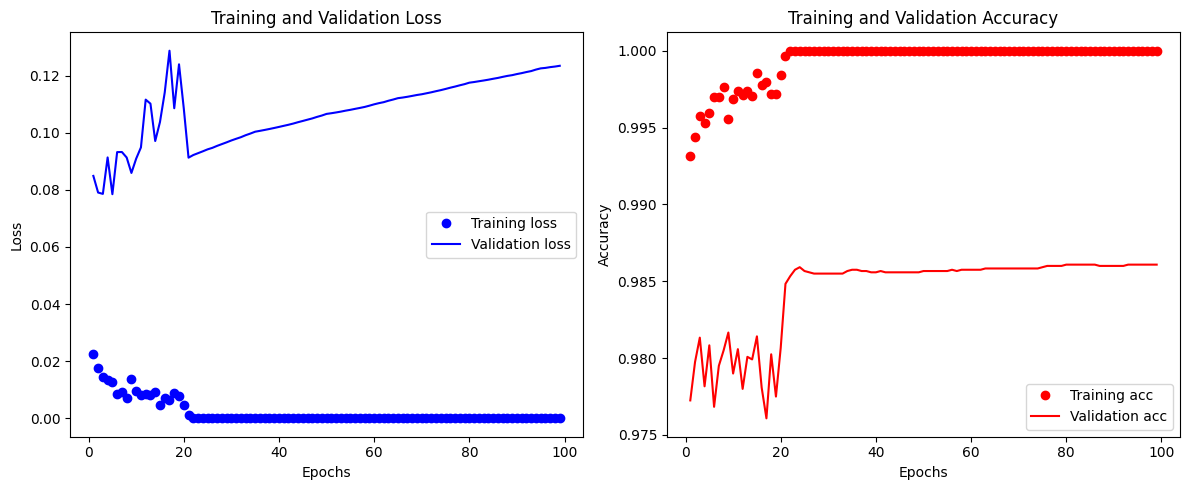

In [92]:
import matplotlib.pyplot as plt

# loss, accuracy, 그리고 val_loss, val_accuracy에 대한 그래프 작성

hist_dict = history.history

# 첫 번째 epoch 제외
loss = hist_dict['loss'][1:]
val_loss = hist_dict['val_loss'][1:]

epochs = range(1, len(loss) + 1)

# Loss 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 그래프
plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = hist_dict['acc'][1:]
val_acc = hist_dict['val_acc'][1:]

# Accuracy 그래프
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 그래프
plt.plot(epochs, acc, 'ro', label='Training acc') # 'ro'는 빨간색 점을 의미
plt.plot(epochs, val_acc, 'r', label='Validation acc') # 'r'는 빨간색 실선을 의미
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 8. 모델 평가(evaluate)

In [93]:
# mnist_best.keras 파일을 로딩해서 모델 평가를 진행
from keras.models import load_model

model = load_model('mnist_best.keras')

In [94]:
# test_images와 test_labels를 사용하여 모델 성능 평가

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9757 - loss: 0.1006
Test Loss: 0.0857
Test Accuracy: 0.9781
